# Public Resources
##### Liam Brem, Xavier Hilmey, Thomas Tran

#### Introduction

For our analysis of the various neighborhoods of Pittsburgh, we wanted to asses which neighborhood was the "best" to live in. We wanted to achieve this by determining which neighborhood had the most public resources for its citizens to use. We chose this because we are big fans of shared resources.

To approach this, we looked at 3 metrics and analyzed three datasets that involved:
* Public Facilities
* Parks
* Police Involvement

We initially had our Public Facilities and Parks picked out; however, we were debating on what to choose for the third one. We initially debated incorporating data about prisons or the air quality but struggled to see how those would fit together with the other two datasets. 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import Choropleth

# Criterion 1: Facilities 🏛️

Facilities are properties owned by the city that are open for public use, an example could be a park bench, pool restrooms, concession stands, etc. Checking how good the neighborhood is based on the quantity of ACTIVE city facilities. In an ideal world, you want to live in a neighborhood that has the most public active facilities for the nicest experience.

Dataset Used: City of Pittsburgh Facilities

In [5]:
facilities = pd.read_csv("facilities.csv")

active_facilities = facilities[facilities['inactive'] == 'f']
hood_counts = active_facilities['neighborhood'].value_counts()

most_hood =  hood_counts.idxmax()
most_count = hood_counts.max()

print("The neighborhood with the most active facilities is " + most_hood + " with " + str(most_count) + " active facilities.")
hood_counts.head()

The neighborhood with the most active facilities is Highland Park with 30 active facilities.


neighborhood
Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
Name: count, dtype: int64

It's not surprising that Highland Park is the neighborhood with the most active facilities because it generally a well-off middle class-upper neighborhood.

# Graph

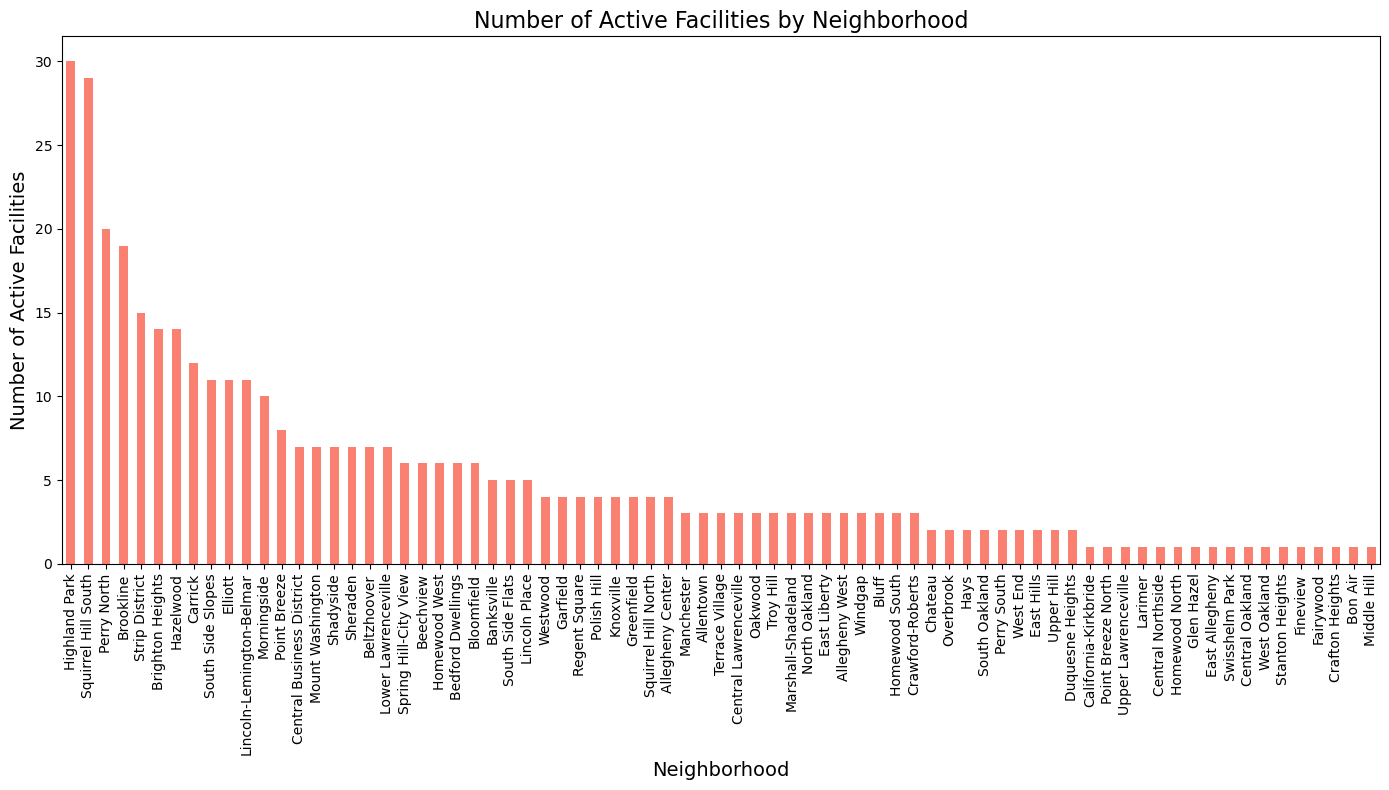

In [6]:
plt.figure(figsize=(14, 8)) 
hood_counts.plot(kind='bar', color='salmon') 
plt.title('Number of Active Facilities by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Active Facilities', fontsize=14)
plt.tight_layout() 
plt.show()

From looking at the graph, it's very logical. Pittsburgh has good, as well as bad neighborhoods, so the severity of how different the amount of facilities for the nicest neighborhood vs the worst neighborhood makes sense.

# Criterion 2: Parks 🛝

One of our criteria is the number of parks per neighborhood. Generally, the more parks, the more desirable/better it is to live there. 

DataSet Used: Pittsburgh Parks

Sort by number of parks in each neighborhood

In [7]:
parks = pd.read_csv("parks.csv")
# rank each neighborhood by number of parks
neighborhoods = parks['neighborhood'].value_counts()
print(neighborhoods)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
                             ..
Hays                          1
Arlington                     1
Stanton Heights               1
Morningside                   1
Squirrel Hill North           1
Name: count, Length: 73, dtype: int64


Create a bar graph for all the neighborhoods using MatPlotLib

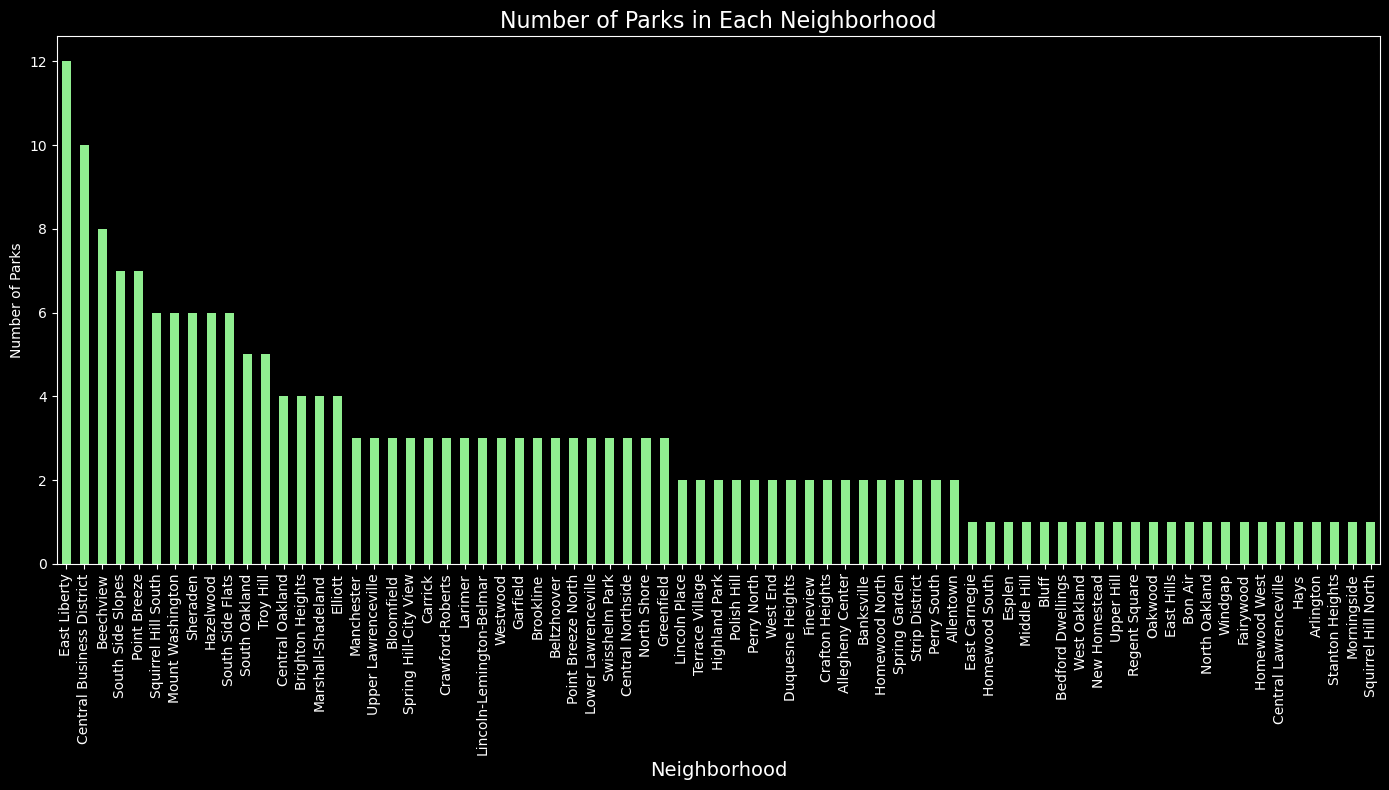

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(14, 8))
neighborhoods.plot(kind='bar', color='lightgreen')
plt.title('Number of Parks in Each Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Parks')
plt.tight_layout()
plt.show()


As you can see, East Liberty has the highest number of parks followed by Central Business District and Beechview.

Create a map of Pittsburgh with a heatmap of the number of parks in each neighborhood. Save the map as an HTML file and display it in the notebook.

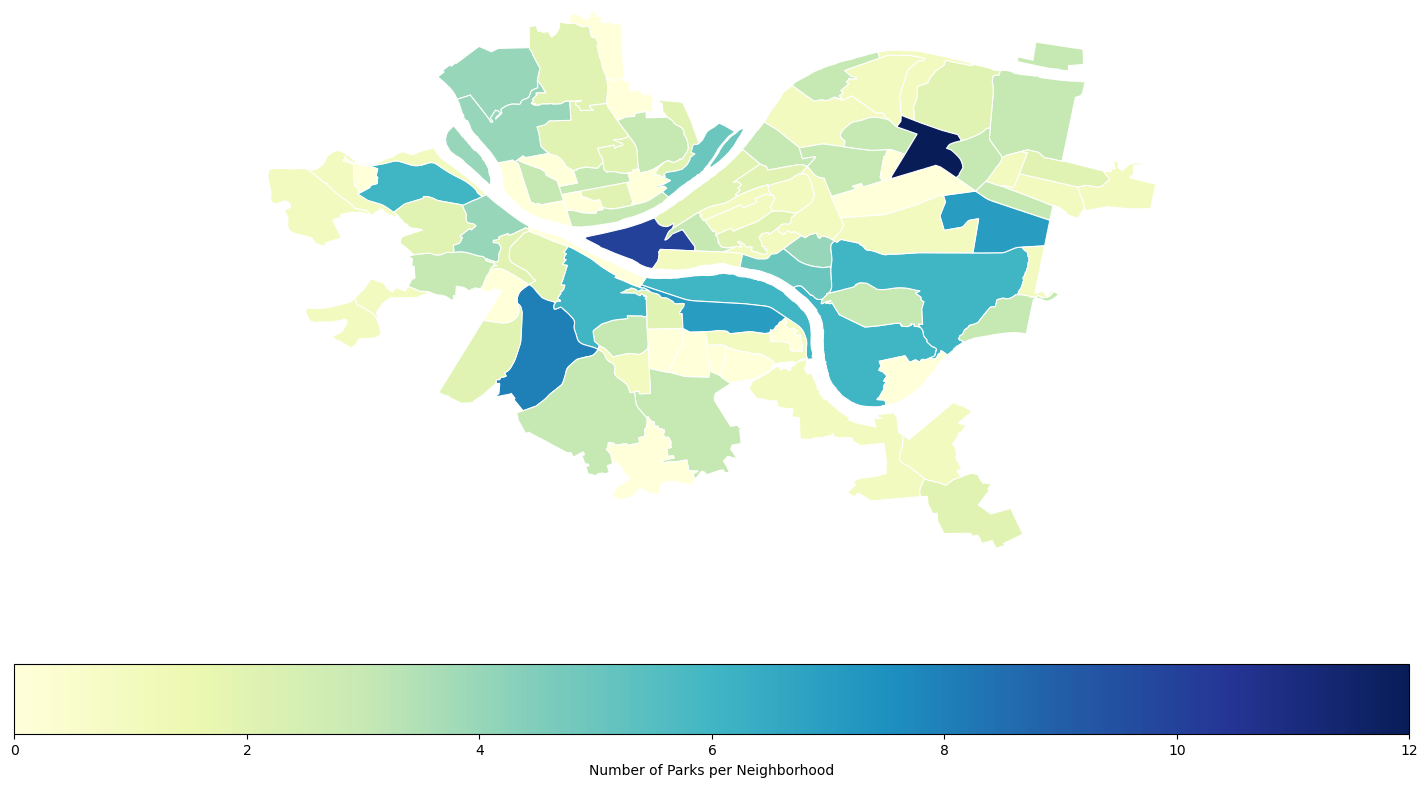

In [ ]:
neighborhoods_geo = gpd.read_file('neighborhoods/neighborhoods_new.shp')  
parks = pd.read_csv("parks.csv")

neighborhood_counts = parks['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'park_count']

neighborhoods_geo = neighborhoods_geo.merge(neighborhood_counts, how="left", left_on="hood", right_on="neighborhood")
neighborhoods_geo['park_count'] = neighborhoods_geo['park_count'].fillna(0)  # Fill NaNs for neighborhoods with no parks

fig, ax = plt.subplots(1, 1, figsize=(18, 10))


neighborhoods_geo.plot(
    column='park_count',  
    cmap='YlGnBu',  
    linewidth=0.8,  
    edgecolor='white',  #
    legend=True,
    legend_kwds={'label': "Number of Parks per Neighborhood", 'orientation': "horizontal"},
    missing_kwds={"color": "lightgrey", "label": "No parks"}  #
    , ax=ax
)

ax.set_aspect('equal') 

ax.set_xlim(neighborhoods_geo.total_bounds[0], neighborhoods_geo.total_bounds[2])
ax.set_ylim(neighborhoods_geo.total_bounds[1], neighborhoods_geo.total_bounds[3])

ax.set_axis_off()

plt.show()

##### Something interesting is that downtown Pittsburgh has a relatively high amount of parks, despite it being so urbanized. 

##### A seen in the maps above, the neighborhoods receiving the most points are:
* East Liberty
* Central Business District
* Beechview

##### And those receieving the least amount of points are all the neighborhoods in light yellow with only 1 park


# Criterion 3: Police Data 🚔